# Versus

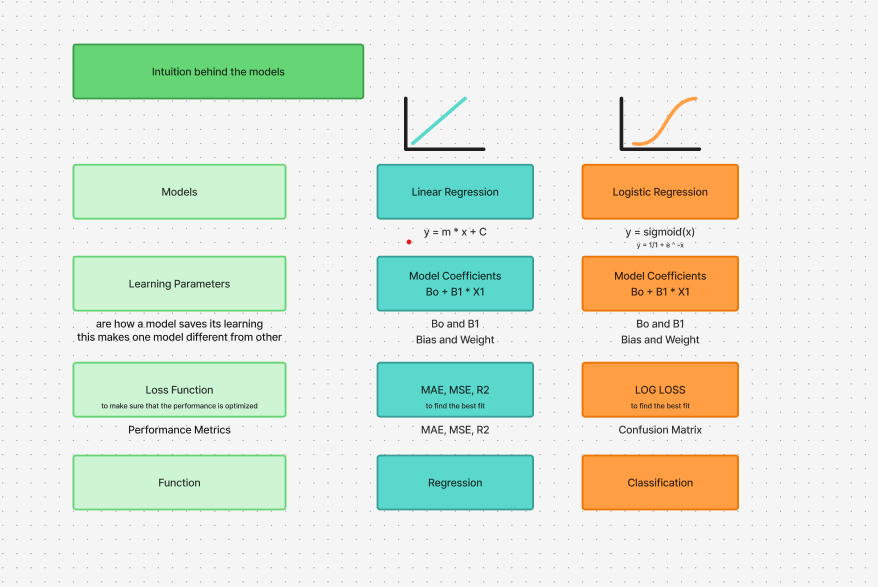

----

# Model Logistic Regression

Loss function = log-loss

- log loss function is depends on Y
- learning parameters = co-efficient = weight and bias w1* x1 + B

Features Engineering: is legit
- the classifier, logistics regression will not accept, contnious value
- we supply categorical value

In [3]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error,r2_score

In [4]:
tips = sns.load_dataset('tips')
df = pd.DataFrame(tips)

In [5]:
x,y =  pd.factorize(df['sex'])
df['sex_factorized'] = x

x,y =  pd.factorize(df['smoker'])
df['smoker_factorized'] = x

x,y =  pd.factorize(df['day'])
df['day_factorized'] = x

x,y =  pd.factorize(df['time'])
df['time_factorized'] = x

In [6]:
x = df[['total_bill',	'size',	'sex_factorized',	'smoker_factorized',	'day_factorized',	'time_factorized']]
y = df["tip"]

In [7]:
x_train = x.loc[:194]
y_train = y.loc[:194]

x_test = x.loc[195:]
y_test = y.loc[195:]

-----

----

In [18]:
pen = sns.load_dataset('penguins')

In [19]:
pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
sex_codes , sex_names = pd.factorize(pen['sex'], use_na_sentinel= True)         # dia akan assign -1 untuk NaN value
pen['sex_code'] = sex_codes
pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,-1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,-1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1


-----

------

In [8]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2,random_state=42)

NameError: name 'train_test_split' is not defined

In [9]:
newtips = sns.load_dataset('tips')

In [10]:
newtips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
smoker_codes, smoker_names = pd.factorize(newtips['smoker'])
newtips['smoker_binary'] = smoker_codes

In [ ]:
sex_codes, sex_names = pd.factorize(newtips['smoker'])
newtips['smoker_binary'] = smoker_codes

In [25]:


y = newtips['smoker_binary']
x = newtips[['total_bill']]

from sklearn.linear_model import LinearRegression,LogisticRegression
model_logistic = LogisticRegression()

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [26]:
model_logistic.fit(x_train,y_train)
y_pred = model_logistic.predict(x_test)

In [27]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [34]:
model_logistic.predict([    [i] for i in range(50)  ])

C:\Users\User\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression